In [1]:
import numpy as np
from scipy.spatial import distance
import pandas as pd
import math
import os
import numpy as np
import nibabel as nibs
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from nilearn import image, datasets, plotting, masking
import pandas as pd
from scipy.spatial import distance

import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

import csv

from rdm_plot_function import plot_rdm
from rdm_calc_function import activity_vector_rdm

def upper(df):
    try:
        assert(type(df)==np.ndarray)
    except:
        if type(df)==pd.DataFrame:
            df = df.values
        else:
            raise TypeError('Must be np.ndarray or pd.DataFrame')
    mask = np.triu_indices(df.shape[0], k=1)
    return df[mask]

In [11]:


nodes_Memnet = ['x', 'conv1', 'relu1', 'pool1', 'norm1', 'conv2', 'relu2', 'pool2', 'norm2', 'conv3', 'relu3', 'conv4', 'relu4', 'conv5', 'relu5', 'pool5', 'getattr', 'getitem', 'view', 'fc6', 'relu6', 'drop6', 'fc7', 'relu7', 'drop7', 'fc8_euclidean']

for x in range (0,25):
    file_path = '/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/memnet/'+nodes_Memnet[x]+'.csv'

    Memnet_layers = pd.read_csv(file_path)

    activity_vectors_path = []

    for column in Memnet_layers.columns:
        try:
            activity_vector = Memnet_layers[column].values.flatten().tolist()
            activity_vectors_path.append(activity_vector)
        except ValueError:
            pass
    
    rdm_data_path = activity_vector_rdm(activity_vectors_path)

    df = pd.DataFrame(rdm_data_path)
    df.to_csv('/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/memnet_rdm/'+nodes_Memnet[x]+'_rdm.csv', index=False)
    print (x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [2]:
nodes_Alexnet = ['x', 'features.0', 'features.1', 'features.2', 'features.3', 'features.4', 'features.5', 'features.6', 'features.7', 'features.8', 'features.9', 'features.10', 'features.11', 'features.12', 'avgpool', 'flatten', 'classifier.0', 'classifier.1', 'classifier.2', 'classifier.3', 'classifier.4', 'classifier.5']

for x in range (0,24):
    file_path = '/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/alexnet/'+nodes_Alexnet[x]+'.csv'

    Alexnet_layers = pd.read_csv(file_path)

    activity_vectors_path = []

    for column in Alexnet_layers.columns:
        try:
            activity_vector = Alexnet_layers[column].values.flatten().tolist()
            activity_vectors_path.append(activity_vector)
        except ValueError:
            pass
    
    rdm_data_path = activity_vector_rdm(activity_vectors_path)

    df = pd.DataFrame(rdm_data_path)
    df.to_csv('/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/alexnet_rdm/'+nodes_Alexnet[x]+'_rdm.csv', index=False)
    print (x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


IndexError: list index out of range

In [3]:
nodes_Memnet = ['x', 'conv1', 'relu1', 'pool1', 'norm1', 'conv2', 'relu2', 'pool2', 'norm2', 'conv3', 'relu3', 'conv4', 'relu4', 'conv5', 'relu5', 'pool5', 'view', 'fc6', 'relu6', 'drop6', 'fc7', 'relu7', 'drop7']

nodes_Alexnet = ['x', 'features.0', 'features.1', 'features.2', 'features.3', 'features.4', 'features.5', 'features.6', 'features.7', 'features.8', 'features.9', 'features.10', 'features.11', 'features.12', 'avgpool', 'flatten', 'classifier.0', 'classifier.1', 'classifier.2', 'classifier.3', 'classifier.4', 'classifier.5']

r_value = []
layer_number = []

for x in range(0,22):

    memnet_path = '/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/memnet_rdm/'+nodes_Memnet[x]+'_rdm.csv'
    alexnet_path = '/Users/ramahuja/Library/CloudStorage/Dropbox-KoLab/ViTA Lab Datastore/users/ram/thesis/data/model_features/alexnet_rdm/'+nodes_Alexnet[x]+'_rdm.csv'
    
    rdm_memnet_df = pd.read_csv(memnet_path)
    rdm_alexnet_df = pd.read_csv(alexnet_path)

    # Make sure that the DataFrames are square matrices
    assert rdm_memnet_df.shape[0] == rdm_memnet_df.shape[1], "RDM DataFrame is not a square matrix"
    assert rdm_alexnet_df.shape[0] == rdm_alexnet_df.shape[1], "RDM DataFrame is not a square matrix"

    # Convert the DataFrames to NumPy arrays
    rdm_memnet = rdm_memnet_df.to_numpy()
    rdm_alexnet = rdm_alexnet_df.to_numpy()
    
    # Use the `upper` function to get the upper triangle of the arrays
    rdm_memnet_upper = upper(rdm_memnet)
    rdm_alexnet_upper = upper(rdm_alexnet)
    
    print(x, rdm_memnet_upper.shape)
    print(x, rdm_alexnet_upper.shape)
    
    # Calculate Spearman's correlation
    spearman_r, _ = spearmanr(rdm_memnet_upper, rdm_alexnet_upper)
    
    r_value.append(spearman_r)
    layer_number.append(x)



0 (19900,)
0 (19900,)
1 (19900,)
1 (19900,)
2 (19900,)
2 (19900,)
3 (19900,)
3 (19900,)
4 (19900,)
4 (19900,)
5 (19900,)
5 (19900,)
6 (19900,)
6 (19900,)
7 (19900,)
7 (19900,)
8 (19900,)
8 (19900,)
9 (19900,)
9 (19900,)
10 (19900,)
10 (19900,)
11 (19900,)
11 (19900,)
12 (19900,)
12 (19900,)
13 (19900,)
13 (19900,)
14 (19900,)
14 (19900,)
15 (19900,)
15 (19900,)
16 (19900,)
16 (19900,)
17 (19900,)
17 (19900,)
18 (19900,)
18 (19900,)
19 (19900,)
19 (19900,)
20 (19900,)
20 (19900,)
21 (19900,)
21 (19900,)


(0.0, 1.0)

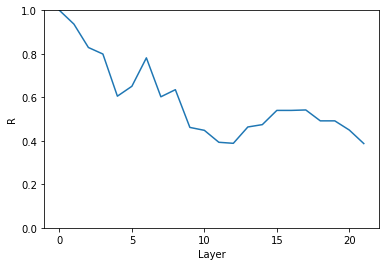

In [4]:
plt.plot(layer_number,r_value)

plt.xlabel('Layer')
plt.ylabel('R')

plt.ylim(0, 1)